In [12]:
import pandas as pd

In [13]:
path_file = "/home/xiao/project/UpFlexTSF/data/ltf/ETT-small/ETTh2.csv"

In [14]:
data_df = pd.read_csv(path_file)

In [15]:
data_df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2,2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
4,2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [16]:
data_df.shape

(17420, 8)

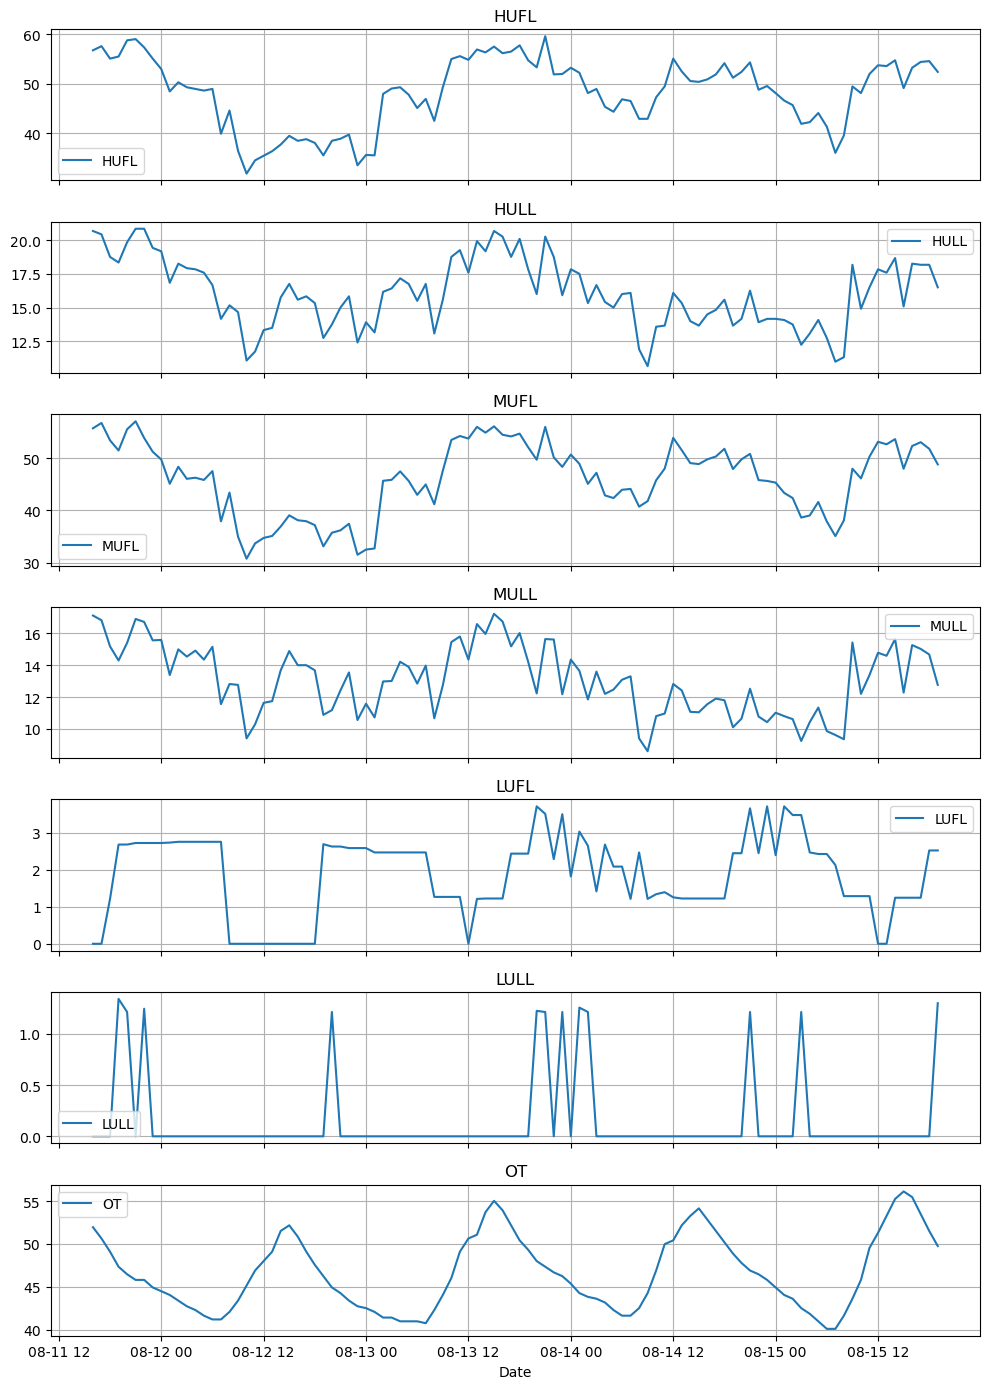

In [18]:
import matplotlib.pyplot as plt

# Define start index and length of the segment
idx_start = 1000
idx_len = 100

# Extract the segment and create a copy
data_segment = data_df.iloc[idx_start:idx_start + idx_len].copy()

# Convert the 'date' column to datetime
data_segment['date'] = pd.to_datetime(data_segment['date'])

# Set up the figure for subplots
variables = data_df.columns[1:]  # Exclude the 'date' column
n_vars = len(variables)

fig, axes = plt.subplots(n_vars, 1, figsize=(10, 2 * n_vars), sharex=True)

for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(data_segment['date'], data_segment[var], label=var)
    ax.set_title(var)
    ax.legend()
    ax.grid()

# Set the x-axis label for the bottom plot
axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()


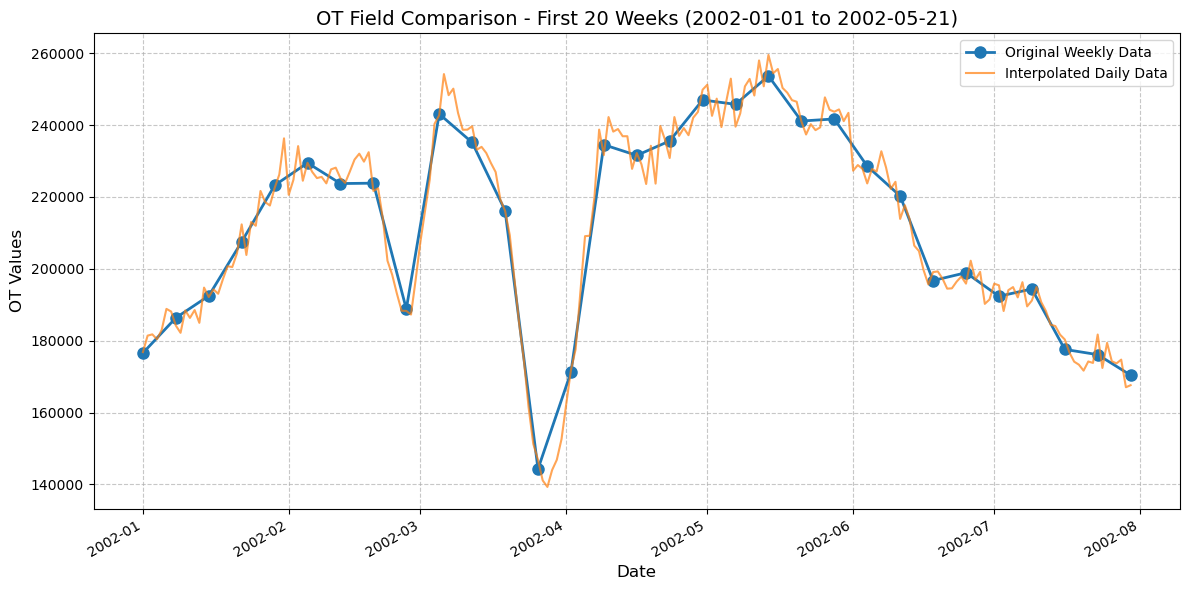

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import timedelta

# Configuration
folder_data = Path("/home/xiao/project/UpFlexTSF/data/ltf/illness")
original_file = folder_data/'national_illness.csv'
interpolated_file = folder_data/'national_illness_ext.csv'
output_plot = folder_data/'OT_comparison.png'

# Read both datasets
df_orig = pd.read_csv(original_file, parse_dates=['date'])
df_interp = pd.read_csv(interpolated_file, parse_dates=['date'])

# Filter first 20 weeks from original data
start_date = df_orig['date'].min()
end_date = start_date + timedelta(weeks=30)

# Filter both datasets to first 20 weeks
df_orig_subset = df_orig[df_orig['date'] <= end_date]
df_interp_subset = df_interp[df_interp['date'] <= end_date]

# Create plot
plt.figure(figsize=(12, 6))

# Plot original weekly data
plt.plot(df_orig_subset['date'], df_orig_subset['OT'], 
         'o-', color='#1f77b4', linewidth=2, markersize=8,
         label='Original Weekly Data')

# Plot interpolated daily data
plt.plot(df_interp_subset['date'], df_interp_subset['OT'], 
         color='#ff7f0e', linewidth=1.5, alpha=0.7,
         label='Interpolated Daily Data')

# Formatting
plt.title('OT Field Comparison - First 20 Weeks (2002-01-01 to 2002-05-21)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('OT Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

# Rotate date labels
plt.gcf().autofmt_xdate()

# Save and show
plt.tight_layout()
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
plt.show()